/var/folders/fg/kvxzkmq52j91ncbp_n_6shkh0000gn/T/ipykernel_47341/2975475424.py:26: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  resized_image = new_image.resize((28, 28), Image.BICUBIC)


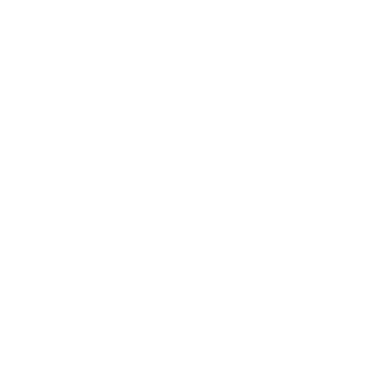

/var/folders/fg/kvxzkmq52j91ncbp_n_6shkh0000gn/T/ipykernel_47341/2975475424.py:26: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  resized_image = new_image.resize((28, 28), Image.BICUBIC)


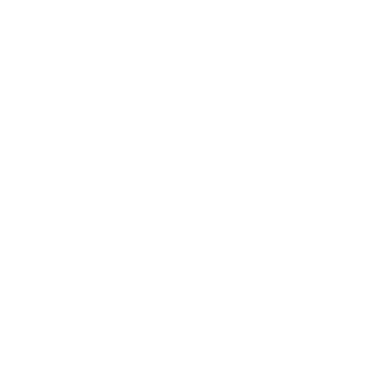

Done


In [2]:
from xgboost import XGBClassifier
from tkinter import *
from PIL import Image, ImageTk, ImageGrab, ImageOps
import tkinter as tk
import tkinter.messagebox as mb
import numpy as np
from joblib import load
import matplotlib as mpl
import matplotlib.pyplot as plt

x_coordinate, y_coordinate = 0, 0

model = load("models/best_model.pkl")

app = Tk()
app.geometry("400x415+" + str(x_coordinate) + "+" + str(y_coordinate))
title = Label(app, text="Digit Predictor", font=("bold", 30))
title.pack()
canvas = Canvas(app, width=300, height=300, bg='white')
canvas.place(x=50, y=50)

def helloCallBack():
    ss_region = (55 + x_coordinate, 115 + y_coordinate, 350, 400)
    new_image = ImageGrab.grab(ss_region)
 
    resized_image = new_image.resize((28, 28), Image.BICUBIC)

    B = ImageOps.grayscale(resized_image)
    pixel_array = 255 - np.array(list(B.getdata()))
    pixel_array = pixel_array.reshape(1, -1)
    
    pred = model.predict(pixel_array)
    confidence = np.max(model.predict_proba(pixel_array)) * 100
    
    plt.imshow(pixel_array.reshape(28, 28), cmap="binary", interpolation='nearest')
    plt.axis('off') 
    plt.show()
    
    displayTitle = "Prediction"
    displayMessage = f"Digit: {pred}\nConfidence: {int(confidence)}%"
    mb.showinfo(displayTitle, displayMessage)
    canvas.delete("all")

btn = Button(app, text='Predict!', width=10,
             height=2, bd='10', command=helloCallBack)
 
btn.place(x=131, y=354)

def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    r=12
    canvas.create_oval(event.x-r, event.y-r, event.x+r, event.y+r, fill='black', outline="black")
    lasx, lasy = event.x, event.y

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()

print("Done")